# Echolocation volume recording

Given a record of echolocation signals, with a speed, pitch, and heading value, we want to generate a volume of "area searched". To do so, we must calculate the volume of the area searched for a single echolocation click, then track the progress of the whale through the track. First, the track movements can be traced. Depth values are provided, and so the only calculations required are the relative positions of the x and y axes, which we calculate through $\sin{h}$ and $\cos{h}$ where $h$ refers to the whale's heading.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dat = pd.read_csv("D++.txt",sep="\t")
tst = {'Depth': dat.D[range(dat.loc[pd.isna(dat.SP5)==True].index[0]-1)],
   'Pitch': dat.wPitchDeg[range(0,dat.loc[pd.isna(dat.SP5)==True].index[0]-1,16)],
   'Roll': dat.wRollDeg[range(0,dat.loc[pd.isna(dat.SP5)==True].index[0]-1,16)],
   'Speed': dat.SP5[range(dat.loc[pd.isna(dat.SP5)==True].index[0]-1)],
   'Head': dat.wHeaddeg[range(0,dat.loc[pd.isna(dat.SP5)==True].index[0]-1,16)]}
dat = pd.DataFrame(data = tst)

Text(4.5, -0.8, 'θ')

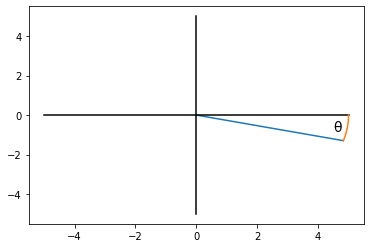

In [2]:
plt.plot([0,5*np.cos(np.deg2rad(15))],[0,-5*np.sin(np.deg2rad(15))])
plt.plot(range(-5,6),np.repeat(0,11),color="black")
plt.plot(np.repeat(0,11),range(-5,6),color="black")
plt.plot(5*np.cos(np.deg2rad(np.linspace(0, 15, num = 100))),-5*np.sin(np.deg2rad(np.linspace(0, 15, num = 100))))
plt.text(4.5,-0.8,"θ",fontsize=14)

In [3]:
dist = dat.Speed * np.cos(np.deg2rad(dat.Pitch))
dat['distTrav'] = np.cumsum(dist)

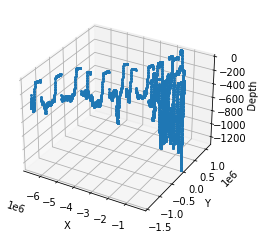

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlim3d([min(np.cumsum(dat.distTrav*np.sin(np.deg2rad(dat.Head)))), 
    max(np.cumsum(dat.distTrav*np.sin(np.deg2rad(dat.Head))))])
ax.set_xlabel('X')

ax.set_ylim3d([min(np.cumsum(dat.distTrav*np.cos(np.deg2rad(dat.Head)))), 
    max(np.cumsum(dat.distTrav*np.cos(np.deg2rad(dat.Head))))])
ax.set_ylabel('Y')

ax.set_zlim3d([-max(dat.Depth),0])
ax.set_zlabel('Depth')

ax.plot(np.cumsum(dat.distTrav*np.sin(np.deg2rad(dat.Head))),np.cumsum(dat.distTrav*np.cos(np.deg2rad(dat.Head))),-dat.Depth,marker='o',markersize=2)

# def animate(frame_num):
#     x = 
#     y = np.sin(x + 2*np.pi * frame_num/100)
#     line.set_data((x, y))
#     return line



# plt.plot(np.cumsum(dat.distTrav*np.sin(np.deg2rad(dat.Head))),np.cumsum(dat.distTrav*np.cos(np.deg2rad(dat.Head))),dat.Depth,marker='o',markersize=2)

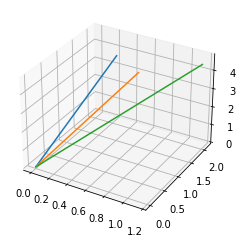

In [18]:
# creating a cone area

# spherical coordinates of point P are determined by two angles, that of the 

fig = plt.figure()
ax = ax = fig.add_subplot(projection='3d')

def sphericalCoords(p,phi,theta,inDegs=True):
    if inDegs == True:
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
    x = p*np.sin(phi)*np.sin(theta)
    y = p*np.sin(phi)*np.cos(theta)
    z = p*np.cos(theta)
    return [x,y,z]

plt.plot([0,sphericalCoords(5,.3,.3,False)[0]],[0,sphericalCoords(5,.3,.3,False)[1]],[0,sphericalCoords(5,.3,.3,False)[2]])
plt.plot([0,sphericalCoords(5,.3,.5,False)[0]],[0,sphericalCoords(5,.3,.5,False)[1]],[0,sphericalCoords(5,.3,.5,False)[2]])
plt.plot([0,sphericalCoords(5,.5,.5,False)[0]],[0,sphericalCoords(5,.5,.5,False)[1]],[0,sphericalCoords(5,.5,.5,False)[2]])

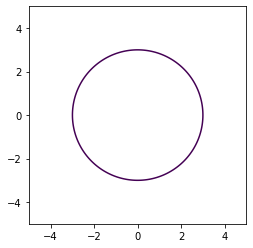

In [21]:
x = np.linspace(-5.0, 5.0, 1000)
y = np.linspace(-5.0, 5.0, 1000)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - 9
fig,ax=plt.subplots()
ax.contour(X,Y,F,[0])
ax.set_aspect(1)

In [86]:
# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi/10:100j, 0.0:2.0*pi:100j]
# phi=np.repeat(np.repeat(15*pi/180,100),100).reshape(100,100)
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

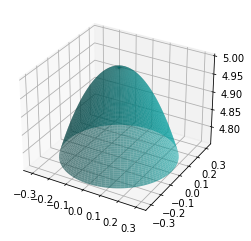

In [87]:
#Set colours and render
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, 5*z,  rstride=1, cstride=1, color='c', alpha=.6, linewidth=0)


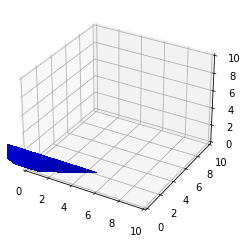

In [81]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import norm
import pylab as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')


def truncated_cone(p0, p1, R0, R1, color):
    """
    Based on https://stackoverflow.com/a/39823124/190597 (astrokeat)
    """
    # vector in direction of axis
    v = p1 - p0
    # find magnitude of vector
    mag = norm(v)
    # unit vector in direction of axis
    v = v / mag
    # make some vector not in the same direction as v
    not_v = np.array([1, 1, 0])
    if (v == not_v).all():
        not_v = np.array([0, 1, 0])
    # make vector perpendicular to v
    n1 = np.cross(v, not_v)
    # print n1,'\t',norm(n1)
    # normalize n1
    n1 /= norm(n1)
    # make unit vector perpendicular to v and n1
    n2 = np.cross(v, n1)
    # surface ranges over t from 0 to length of axis and 0 to 2*pi
    n = 80
    t = np.linspace(0, mag, n)
    theta = np.linspace(0, 2 * np.pi, n)
    # use meshgrid to make 2d arrays
    t, theta = np.meshgrid(t, theta)
    R = np.linspace(R0, R1, n)
    # generate coordinates for surface
    X, Y, Z = [p0[i] + v[i] * t + R *
               np.sin(theta) * n1[i] + R * np.cos(theta) * n2[i] for i in [0, 1, 2]]
    ax.plot_surface(X, Y, Z, color=color, linewidth=0, antialiased=False)


A0 = np.array([0, 0, 0])
A1 = np.array([1, 1, 0])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
truncated_cone(A0, A1, 1, 5, 'blue')
plt.show()